<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● 'No-show': it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up



### Question(s) for Analysis

###  what is the factors that affect of the patient no show ?

In [1]:

# importing python library
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

> In this section i will Load and Explore the data





In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)




,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [ ]:
#to know the number of rows and columns
print(df.shape)

In [ ]:
#to explore noshow appointemnts data 
df.info()

In [ ]:
# to check for duplicates 
df.duplicated().sum()


In [ ]:
#check for the number of unique values in patientId column
df.PatientId.nunique()

In [ ]:
#there's a duplicated values in PatientId column so that i need to know the number of duplications on it
df.PatientId.duplicated().sum()

In [ ]:
#check for any null values in my dataset
df.isnull().sum()

In [ ]:
# to Explore the describtive statistics 
df.describe()

In [ ]:
# to know the number of each value in rows to see the number of value -1 in age column
df['Age'].value_counts()

In [ ]:
#to know the index of value -1 
df[df['Age']==-1]



### Data Cleaning
> in this section I will clean data by removing duplicated values , incorrect rows ,changing the datatype of columns and rename columns

In [3]:
# drop the value -1 in column Age 
df.drop(index=99832,inplace=True)


In [4]:
# to check that the value -1 is dropped by looking at value_counts again
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [5]:
# to rename columns (PatientId,Hipertension,Handcamp,No-show,SMS_received)
df.rename(columns={'PatientId':'PatientID',
                   'Hipertension':'Hypertension',
                   'Handcamp':'Handicamp',
                   'SMS_received':'SMS_Received',
                   'No-show':'No_Show',
                   'Scholarship':'Insurance'
                  },inplace=True)

#display the new name of columns 
df.head(0)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show


In [6]:
#changing the data type for columns Scholarship , Hypertension,Diabetes,  Alcoholism , Handcap , SMS_Received to bool
for x in ['Insurance','Hypertension','Diabetes','Alcoholism','Handcap','SMS_Received']:
    df[x]= df[x].astype('bool')
    
#changing the data type for columns ScheduledDay and AppointmentDay to datetime
for x in ['ScheduledDay','AppointmentDay']: 
    df[x]= pd.to_datetime(df[x])
    
df.dtypes

PatientID                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Insurance                   bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_Received                bool
No_Show                   object
dtype: object

In [7]:
#change the datatype of No_Show
df['No_Show'] = df['No_Show'].replace(['Yes'], 1)
df['No_Show'] = df['No_Show'].replace(['No'], 0)
# then chage to numeric 
df['No_Show'] = pd.to_numeric(df['No_Show'])
df.dtypes


PatientID                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Insurance                   bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_Received                bool
No_Show                    int64
dtype: object

In [8]:
#chainging the No_Show column datatype to bool
df['No_Show']=df['No_Show'].astype('bool')
df.dtypes

PatientID                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Insurance                   bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_Received                bool
No_Show                     bool
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> in this section i will explore the No_show_appointment data






# what  factors Can affect on  No show appointment?

Explore my data as a general look 

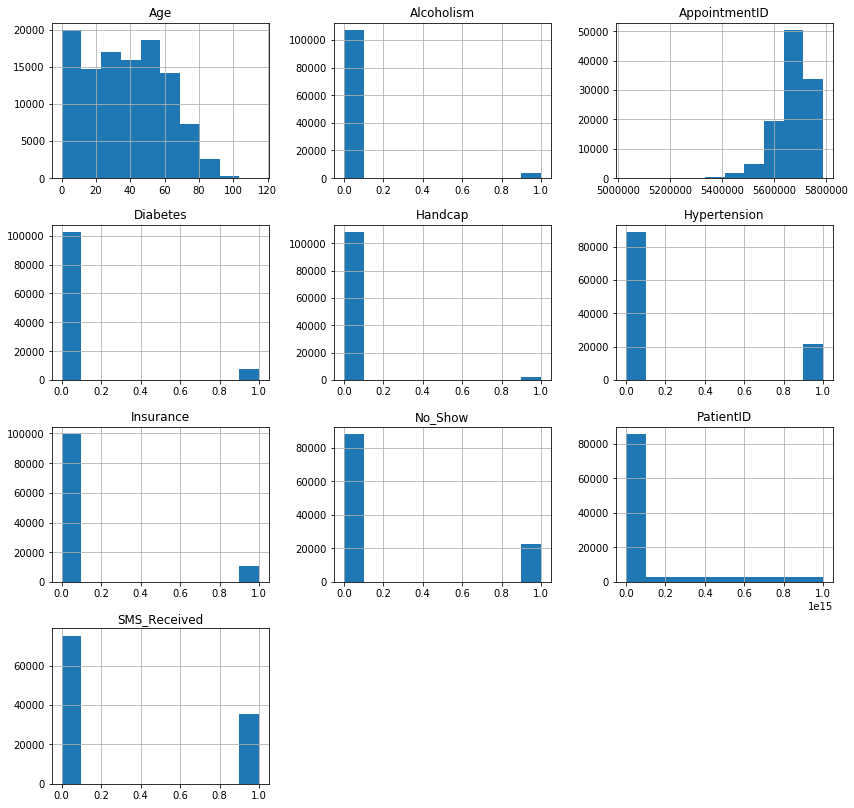

In [12]:
# i need to visualze each cloumn of my data as a general look 
df.hist(figsize=(14,14));


Explore No Show columns 


In [13]:
# the percentage of patient how not attend the oppintment 
len(df[df['No_Show']==False])/len(df['No_Show'])

0.7980656135208005

In [14]:
# the values in no show column
df['No_Show'].value_counts()

False    88207
True     22319
Name: No_Show, dtype: int64

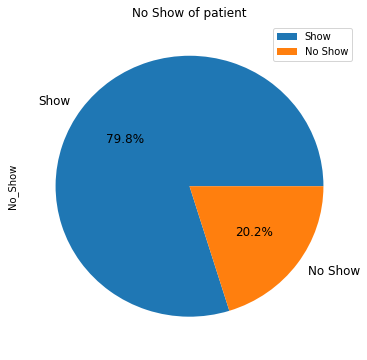

In [15]:
#visualize noshow column 
plt.figure(figsize=(6,6))
plt.title('No Show of patient');
df['No_Show'].value_counts().plot(kind='pie',labels = ['Show', 'No Show'],autopct='%1.1f%%',fontsize = 12);
plt.legend();
plt.show()



### 1- the affect of SMS_Received and the No show




False    75044
True     35482
Name: SMS_Received, dtype: int64

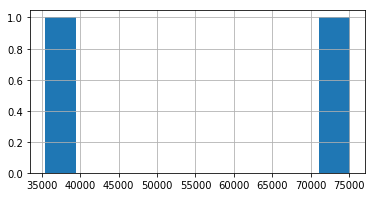

In [9]:
#visualize the values in SMS_Received column 
def Histogram (arg):
  df[arg].value_counts().hist(figsize=(6,3))


Histogram ('SMS_Received')

#count the values in sms received column
df['SMS_Received'].value_counts()


Text(0.5,1,"'The percentages of no show based on SMS Received")

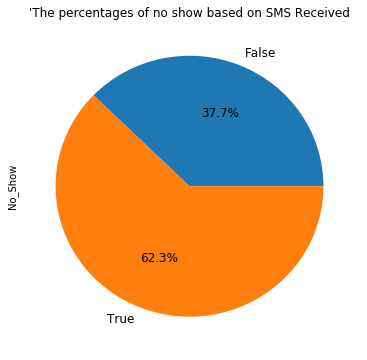

In [16]:
# the relation between  peaple how Received sms and  attend their appointment 
df_sms=df.groupby('SMS_Received').No_Show.mean()*100

df_sms.plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',fontsize = 12);
plt.title("'The percentages of no show based on SMS Received")


In [23]:
#the datials about how sms received and no show
df_sms=df.groupby('SMS_Received').No_Show.value_counts()
df_sms

SMS_Received  No_Show
False         False      62509
              True       12535
True          False      25698
              True        9784
Name: No_Show, dtype: int64

most of people that didn't recieve sms missed there appointment 

### 2- the affect of the gender and the attendance
 

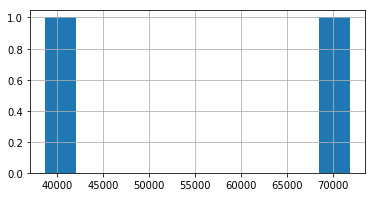

In [10]:
#visualize the values in gender column 
#df['Gender'].value_counts().hist(figsize=(5,3));
Histogram ('Gender')

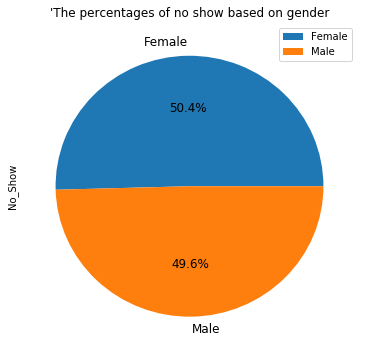

In [17]:
# the relation between gender and how attend their appointment 
df_gender=df.groupby('Gender').No_Show.mean()*100

df_gender.plot(kind='pie',labels = ['Female', 'Male'],figsize=(6,6),autopct='%1.1f%%',fontsize = 12);
plt.title("'The percentages of no show based on gender")
plt.legend()


More females didn't show thier appointment than males. However, gender has no significant effect on the commitment 
of the patient to his appointment.

In [24]:
#the datials about gender and no show
df_gender=df.groupby('Gender').No_Show.value_counts()
df_gender

Gender  No_Show
F       False      57245
        True       14594
M       False      30962
        True        7725
Name: No_Show, dtype: int64

### 3- the affect of Scolarship at the attendance


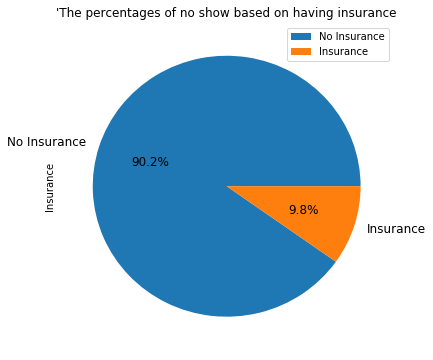

In [18]:
# the affect of scolarship
df['Insurance'].value_counts().plot(kind='pie',labels = ['No Insurance', 'Insurance'],figsize=(6,6),autopct='%1.1f%%',fontsize = 12);
plt.title("'The percentages of no show based on having insurance")
plt.legend()

Text(0.5,1,"'The percentages of no show based on having insurance")

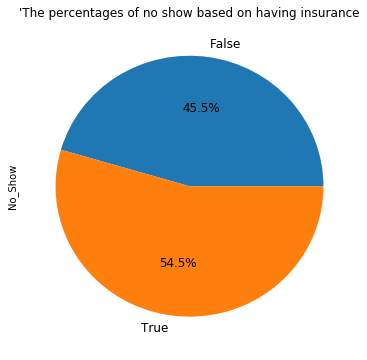

In [19]:
#the relation of scolarship and people how no show their appointment 
df_insurance=df.groupby('Insurance').No_Show.mean()*100

df_insurance.plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',fontsize = 12);
plt.title("'The percentages of no show based on having insurance")



Patients that having insurance missed thier appointments more than people with no insurance.

In [25]:
#more detials of no show based on insurance
df.groupby('Insurance').No_Show.value_counts()

Insurance  No_Show
False      False      79924
           True       19741
True       False       8283
           True        2578
Name: No_Show, dtype: int64

### 3- the affect of Age at the attendance


In [ ]:
# view min, 25%, 50%, 75%, max age values
df['Age'].describe()

In [20]:
# divide ages into 4 groups
groups = [-1, 18, 37, 55, 115] 
age_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], groups, labels=age_names)
df.insert(6, 'AgeGroup', age_group)
df.head(10)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,AgeGroup,Neighbourhood,Insurance,Hypertension,Diabetes,Alcoholism,Handcap,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,56 and above,JARDIM DA PENHA,False,True,False,False,False,False,False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,56 and above,JARDIM DA PENHA,False,False,False,False,False,False,False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,56 and above,MATA DA PRAIA,False,False,False,False,False,False,False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,0-18,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,56 and above,JARDIM DA PENHA,False,True,True,False,False,False,False
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,56 and above,REPÚBLICA,False,True,False,False,False,False,False
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,19-37,GOIABEIRAS,False,False,False,False,False,False,True
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,38-55,GOIABEIRAS,False,False,False,False,False,False,True
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,19-37,ANDORINHAS,False,False,False,False,False,False,False
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,19-37,CONQUISTA,False,False,False,False,False,False,False


0-18            28866
56 and above    27504
19-37           27250
38-55           26906
Name: AgeGroup, dtype: int64

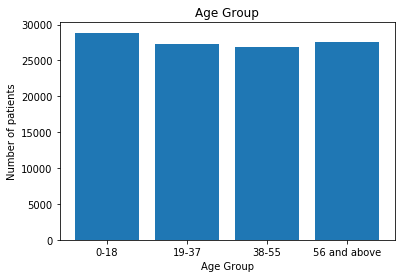

In [21]:
#Visualize AgeGroup column 

plt.figure(figsize = [6, 4])
plt.bar(x = df['AgeGroup'].value_counts().index, height =df['AgeGroup'].value_counts() )
plt.title('Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of patients');

#count values at age group
df['AgeGroup'].value_counts()

Text(0.5,1,"'The percentages of no show based on Age Groups")

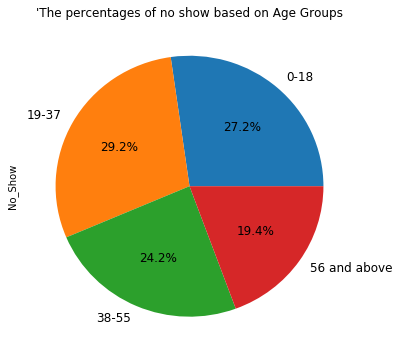

In [22]:
# the relation of ages and  no show patients  
df_age = df.groupby('AgeGroup').No_Show.mean() * 100

df_age.plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',fontsize = 12);
plt.title("'The percentages of no show based on Age Groups")


the young group age (19-37) can't show thier appointment and group 56 above can show thier appointment

In [26]:
#more detials of no show based on Age Groups
df.groupby('AgeGroup').No_Show.value_counts()

AgeGroup      No_Show
0-18          False      22519
              True        6347
19-37         False      20836
              True        6414
38-55         False      21651
              True        5255
56 and above  False      23201
              True        4303
Name: No_Show, dtype: int64

<a id='conclusions'></a>
## Conclusions
 >I analyzed No show Dataset by using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset contained 110,527 appointments and there's 20.2% of the patients didn't show up for their appointments.
 
 > patients that didn't show up there appointment is 
  
      ● who didn't recieved SMS.
 
      ● Femals.
 
      ● have an Insurance.
 
      ● young age group (19-37) 
  
 
## The answer of the question is :-

### 1- SMS_Received factor 
> the most of patient that didn't recieved sms didn't show thier appointment 
  
### 2- Gender factor
> gender factor is littel bit can affect of no show but i see female is the most gender that didn't show thier appointemnt

### 3- Scolarship factor 
> people that have insurance can't show thier appointment

### 4- age factor 
> the young group age (19-37) can't show thier appointment and group 56 above can show thier appointment 

## Limitation 
>the data was not enough to draw a solid conclusion about why patient do not show thier appointment 



## Resources 
>https://stackoverflow.com/ for searching about errors 

>https://matplotlib.org/stable/gallery/index.html

>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!




In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0